<a href="https://colab.research.google.com/github/shreyasrajesh0308/ECE188DeepLearning/blob/main/Adv_example_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform an Adversarial attack.

For the second part of the project we consider a trained model (MobileNet) which is trained on the imagenet dataset. 

We use an evasion attack called [FGSM](https://neptune.ai/blog/adversarial-attacks-on-neural-networks-exploring-the-fast-gradient-sign-method#:~:text=The%20Fast%20Gradient%20Sign%20Method%20(FGSM)%20combines%20a%20white%20box,model%20into%20making%20wrong%20predictions.) to fool the neural network into making incorrect predictions.

## Import Packages.

Import the necessary packages we continue to use Tensorflow and Keras

In [90]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing import image

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

## Load the Pretrained model. 

We use the [MobileNetV2](https://arxiv.org/abs/1801.04381) model trained on the [Imagenet](https://www.image-net.org/) dataset. 

In [91]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

### Helper Function for Data Processing


Following functions can be used for data processing. Dont worry about these, just use them. 

In [92]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

## Load an Image. 


Load any image, we consider an image of a Golden Retriever. 

In [93]:

image_raw = tf.io.read_file('images/n01491361_tiger_shark.JPEG')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 [==============================] - 0s 487ms/step


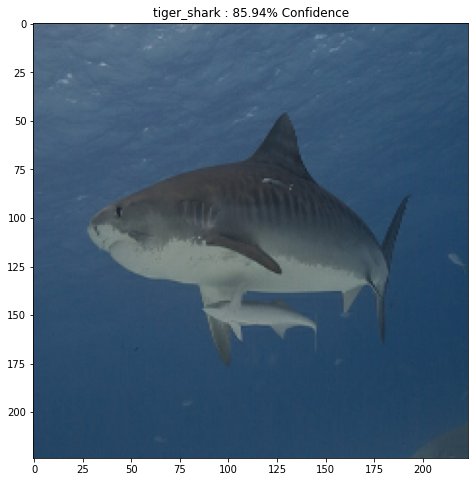

In [94]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

## Create the Adversarial Image. 

We use the FGSM method to create an adversarial image. Be sure to read about FGSM to understand how the attack works. 

In [95]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

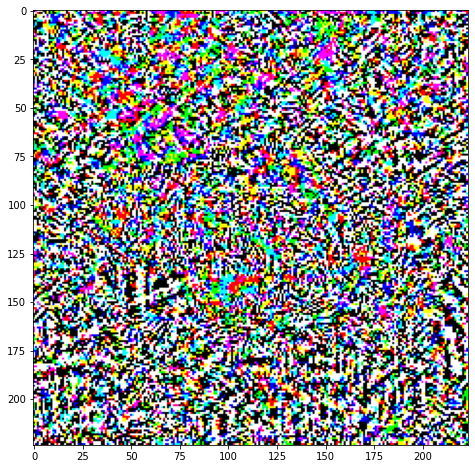

In [96]:
# Get the input label of the image.
giant_panda_index = 1000
label = tf.one_hot(giant_panda_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [97]:
def display_images(image, description, label, confidence):
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 [==============================] - 0s 45ms/step


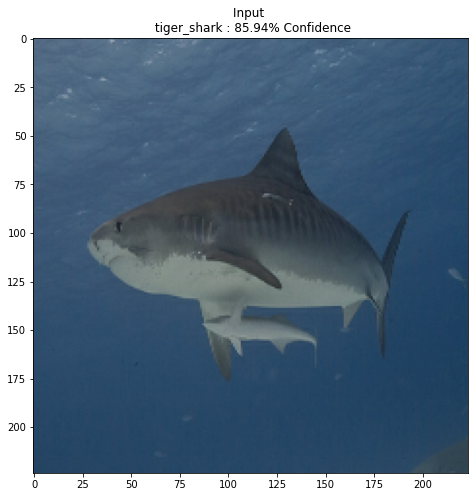

1/1 [==============================] - 0s 45ms/step


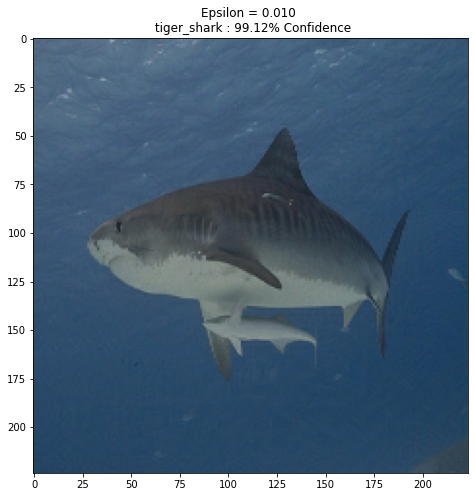

1/1 [==============================] - 0s 41ms/step


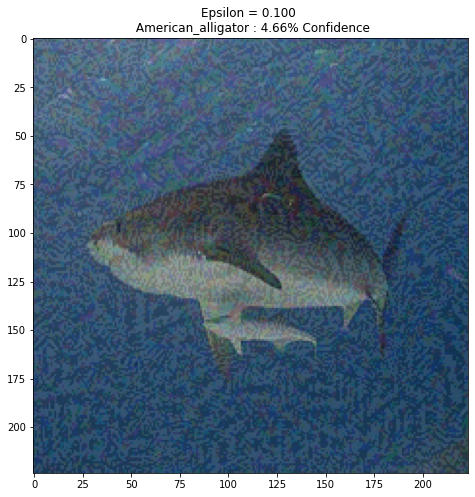

1/1 [==============================] - 0s 42ms/step


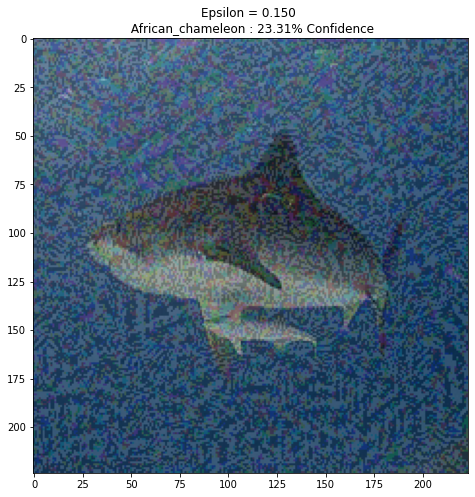

In [98]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x))
  display_images(adv_x, descriptions[i], label, confidence)

# Task2: Perform an Analysis to understand the potency of the attack. 

Your task here is to understand how small a change could change the class output and this is measured by the epsilon value needed to change the class. 

Your task is as follows:

* Pick 10 images each from different classes in imagenet. 
* Perform a perturbation analysis on each of these images. 
* In the analysis you are required to report the smallest epsilon value for which you notice a class change. 
* Make a table for each of the images considered with the minimum epsilon value for the FGSM attack. 

Write the Code for the above below. You can add the table also below. 

In [99]:
import os
import random

In [100]:
# Grab 10 images from 10 distinct imagenet classes
image_files = os.listdir('images')
image_files = [image_files[i] for i in range(10)] # Get a random subset of 10 images
print(image_files)
images = []
for filename in image_files:
    image_raw = tf.io.read_file('images/' + filename) #todo check for exceptions
    image = tf.image.decode_image(image_raw)
    images.append(image)
 


['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']


In [101]:
# Preprocess images and get predictions
images = [preprocess(image) for image in images]
image_probs_collected = [pretrained_model.predict(image) for image in images]

1/1 [==============================] - 0s 41ms/step


<a href="https://colab.research.google.com/github/shreyasrajesh0308/ECE188DeepLearning/blob/main/Adv_example_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

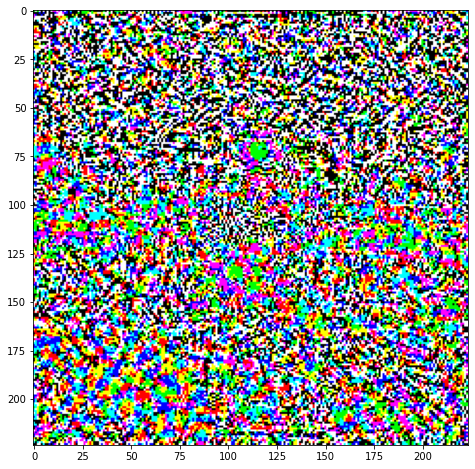

In [102]:
# Use the FGSM method to create an adversarial image for each image
loss_object = tf.keras.losses.CategoricalCrossentropy()

perturbations_collected = []
class_index = 200 # ? ?
for image_probs, image in zip(image_probs_collected, images):
    label = tf.one_hot(class_index, image_probs.shape[-1])
    label = tf.reshape(label, (1, image_probs.shape[-1]))

    perturbations = create_adversarial_pattern(image, label)
    perturbations_collected.append(perturbations)
    plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [106]:


# Perform pertubation analysis for increasing epsilon values until class change occurs

def describe(eps):
  if eps:
    return 'Epsilon = {:0.2f}'.format(eps)
  return 'Input'
  
f = open("output_table", "a")               
for image, perturbations in zip(images, perturbations_collected):
  # For each image take note of its starting label, and then
  # increase epsilon until the class prediction changes.
  starting_label = ''
  eps = 0.0

  for _ in range(100):

    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x))
  
    if starting_label == '':
      starting_label = label
      print(label)
    elif label != starting_label:
      #display_images(adv_x, describe(eps), label, confidence)
      #print(label, eps)
      f.write('|' + '{:0.2f}'.format(eps) + '\n')
      print('|' + '{:0.2f}'.format(eps) + '\n')
      break
    else:
      eps += 0.01

   

1/1 [==============================] - 0s 42ms/step
tench
1/1 [==============================] - 0s 45ms/step
|0.31

1/1 [==============================] - 0s 41ms/step
goldfish
1/1 [==============================] - 0s 41ms/step
|0.09

1/1 [==============================] - 0s 42ms/step
great_white_shark
1/1 [==============================] - 0s 44ms/step
|0.04

1/1 [==============================] - 0s 42ms/step
tiger_shark
1/1 [==============================] - 0s 40ms/step
|0.10

1/1 [==============================] - 0s 41ms/step
swimming_trunks
1/1 [==============================] - 0s 50ms/step
|0.08

1/1 [==============================] - 0s 47ms/step
electric_ray
1/1 [==============================] - 0s 42ms/step
|0.21

1/1 [==============================] - 0s 42ms/step
electric_ray
1/1 [==============================] - 0s 42ms/step
|0.01

1/1 [==============================] - 0s 42ms/step
cock
1/1 [==============================] - 0s 44ms/step
|0.09

1/1 [===============

| label | label' | epsilon |
|-------|--------|---------|
|toy_terrier       |walker_hound        |0.04         |
|pop_bottle       |wool        |0.29         |
|patas       |lion        |0.12         |
|car_mirror       |tray        |0.14         |
|gas_pump       |cash_machine        |0.04         |
|sandal       |pomegranate        |0.09         |
|american_chameleon       |african_chameleon        |0.23         |
|flagpole       |cinema        |0.07         |
|projector       |electric_fan        |0.12         |
|laptop       |prayer_rug        |0.12         |
|       |        | Avg. 0.13       |

# Task3: Compare the robustness of the considered model with other models. 

Your task here is to compare how this model (MobileNetV2) compares with other popular object detection models. 

Your task is as follows:

* Consider 5 different models (you can consider various RESNET architectures, any models you find interesting).
* Load the pre-trained weights of the model (trained on imagenet). 
* Perform Task2 on all the considered models. 
* Add all the results in the table. Hence the final table you have 6 columns for each model and epsilon values for each of the 10 images for all 6 models. 


What do you observe? Why do you think this is the case? 

Write the Code for the above below. You can also add the table and answer to the question below. 


In [84]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os
import random
import sys

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs, decode_predictions):
  return decode_predictions(probs, top=1)[0][0]

def create_adversarial_pattern(input_image, input_label, pretrained_model, loss_object):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

def describe(eps):
  if eps:
    return 'Epsilon = {:0.2f}'.format(eps)
  return 'Input'

def display_images(image, description, label, confidence):
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence*100))
  plt.show()


# Task 2 In One Block, plug in a model
def task_2(pretrained_model,decode_predictions):

  # Grab 10 images from 10 distinct imagenet classes
  image_files = os.listdir('images')
  image_files = [image_files[i] for i in range(10)] # Get a random subset of 10 images
  print(image_files)
  images = []
  for filename in image_files:
    image_raw = tf.io.read_file('images/' + filename) #todo check for exceptions
    image = tf.image.decode_image(image_raw)
    images.append(image)
  
  # Preprocess images and get predictions
  images = [preprocess(image) for image in images]
  image_probs_collected = [pretrained_model.predict(image) for image in images]

  # Use the FGSM method to create an adversarial image for each image
  loss_object = tf.keras.losses.CategoricalCrossentropy()


  perturbations_collected = []
  class_index = 200 # ? ?
  for image_probs, image in zip(image_probs_collected, images):
    label = tf.one_hot(class_index, image_probs.shape[-1])
    label = tf.reshape(label, (1, image_probs.shape[-1]))

    perturbations = create_adversarial_pattern(image, label, pretrained_model, loss_object)
    perturbations_collected.append(perturbations)
    #plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

    # Perform pertubation analysis for increasing epsilon values until class change occurs
  
  f = open("output_table", "a")
  for image, perturbations in zip(images, perturbations_collected):
    # For each image take note of its starting label, and then
    # increase epsilon until the class prediction changes.
    starting_label = ''
    eps = 0.0

    for _ in range(100):

      adv_x = image + eps*perturbations
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x), decode_predictions)

      if starting_label == '':
        starting_label = label
      elif label != starting_label:
          #display_images(adv_x, describe(eps), label, confidence)
          #f.write('|' + starting_label + '|' + label + '|' + '{:0.2f}'.format(eps) + '|\n')
          f.write('|' + '{:0.2f}'.format(eps) + '\n')
          print('|' + '{:0.2f}'.format(eps) + '\n')
          break
      else:
          eps += 0.01
  f.close()

    

Model 1: MobileNet

In [85]:
# Model 1: MobileNet
pretrained_model = tf.keras.applications.MobileNet(include_top=True, weights='imagenet')
pretrained_model.trainable = False  

decode_predictions = tf.keras.applications.mobilenet.decode_predictions # ImageNet labels

task_2(pretrained_model, decode_predictions)

['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']
1/1 [==============================] - 0s 33ms/step
|0.59

1/1 [==============================] - 0s 37ms/step
|0.28

1/1 [==============================] - 0s 37ms/step
|0.06

1/1 [==============================] - 0s 38ms/step
|0.18

1/1 [==============================] - 0s 36ms/step
|0.13

1/1 [==============================] - 0s 47ms/step
|0.01

1/1 [==============================] - 0s 35ms/step
|0.22

1/1 [==============================] - 0s 35ms/step
|0.40

1/1 [==============================] - 0s 36ms/step
|0.38

1/1 [==============================] - 0s 34ms/step
|0.19



Model 2: MobileNetV3Large

In [86]:
# Model 2: MobileNetV3Large
pretrained_model = tf.keras.applications.MobileNetV3Large(include_top=True, weights='imagenet')
pretrained_model.trainable = False  

decode_predictions = tf.keras.applications.mobilenet_v3.decode_predictions # ImageNet labels

task_2(pretrained_model, decode_predictions)

['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']
1/1 [==============================] - 0s 40ms/step
|0.44

1/1 [==============================] - 0s 40ms/step
|0.67

1/1 [==============================] - 0s 40ms/step
|0.64

1/1 [==============================] - 0s 40ms/step
|0.84

1/1 [==============================] - 0s 40ms/step
|0.24

1/1 [==============================] - 0s 40ms/step
|0.90

1/1 [==============================] - 0s 41ms/step
|0.40

1/1 [==============================] - 0s 41ms/step
|0.61

1/1 [==============================] - 0s 40ms/step
|0.79

1/1 [==============================] - 0s 41ms/step


Model 3: ResNet50

In [87]:

# Model 3: ResNet50
pretrained_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
pretrained_model.trainable = False  

decode_predictions = tf.keras.applications.resnet50.decode_predictions # ImageNet labels

task_2(pretrained_model, decode_predictions)

['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']
1/1 [==============================] - 0s 110ms/step
|0.29

1/1 [==============================] - 0s 107ms/step
|0.29

1/1 [==============================] - 0s 109ms/step
|0.17

1/1 [==============================] - 0s 112ms/step
|0.32

1/1 [==============================] - 0s 109ms/step
|0.09

1/1 [==============================] - 0s 108ms/step
|0.58

1/1 [==============================] - 0s 112ms/step
|0.04

1/1 [==============================] - 0s 111ms/step
|0.30

1/1 [==============================] - 0s 109ms/step
|0.13

1/1 [==============================] - 0s 118ms/step
|0.28



Model 4: ResNetRS200

In [88]:

# Model 4: ResNetRS200
pretrained_model = tf.keras.applications.ResNetRS200(include_top=True, weights='imagenet')
pretrained_model.trainable = False  

decode_predictions = tf.keras.applications.resnet_rs.decode_predictions # ImageNet labels

task_2(pretrained_model, decode_predictions)

['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']
1/1 [==============================] - 0s 332ms/step
|0.37

1/1 [==============================] - 0s 360ms/step
|0.66

1/1 [==============================] - 0s 337ms/step
|0.54

1/1 [==============================] - 0s 339ms/step
|0.20

1/1 [==============================] - 0s 346ms/step
|0.02

1/1 [==============================] - 0s 343ms/step
|0.48

1/1 [==============================] - 0s 338ms/step
|0.47



Model 5: ResNetRS50

In [89]:

# Model 5: ResNetRS50
pretrained_model = tf.keras.applications.NASNetMobile(include_top=True, weights='imagenet')
pretrained_model.trainable = False  

decode_predictions = tf.keras.applications.nasnet.decode_predictions # ImageNet labels

task_2(pretrained_model, decode_predictions)

['n01440764_tench.JPEG', 'n01443537_goldfish.JPEG', 'n01484850_great_white_shark.JPEG', 'n01491361_tiger_shark.JPEG', 'n01494475_hammerhead.JPEG', 'n01496331_electric_ray.JPEG', 'n01498041_stingray.JPEG', 'n01514668_cock.JPEG', 'n01514859_hen.JPEG', 'n01518878_ostrich.JPEG']
1/1 [==============================] - 0s 67ms/step
|0.06

1/1 [==============================] - 0s 67ms/step
|0.37

1/1 [==============================] - 0s 71ms/step
|0.03

1/1 [==============================] - 0s 67ms/step
|0.26

1/1 [==============================] - 0s 67ms/step
|0.25

1/1 [==============================] - 0s 68ms/step
|0.02

1/1 [==============================] - 0s 67ms/step
|0.20

1/1 [==============================] - 0s 68ms/step
|0.17

1/1 [==============================] - 0s 67ms/step
|0.07

1/1 [==============================] - 0s 67ms/step
|0.01



Epsilon Values for the six models using randomly selected images for each model.

| MobileNet | MobileNetV3large | ResNet50 | ResNetRS200 | ResNetRS50 | MobileNetV2 |
|-------|--------|--------|--------|--------|--------|
|0.03	|0.12	|0.12	|0.40	|0.67 |0.04 |
|0.30	|0.01	|0.02	|0.26	|0.26 |0.29 |
|0.16	|0.50	|0.12	|0.55	|0.02 |0.12 |
|0.25	|0.13	|0.25	|0.41	|0.01 |0.14 |
|0.16	|0.66	|0.28	|0.07	|0.08 |0.04 |
|0.42	|0.48	|0.25   |		|0.01 |0.09 |
|0.44	|0.64	|0.13	|    	|0.13 |0.23 |
|0.37	|0.45	|0.01	|    	|0.28 |0.12 |
|0.09	|0.07	|0.06	|    	|0.01 |0.12 |
|0.38		    |0.34	|	    |     |     |


Epsilon values for the size models using the same images for each model.

| MobileNet | MobileNetV3large | ResNet50 | ResNetRS200 | ResNetRS50 | MobileNetV2 |
|-------|--------|--------|--------|--------|--------|
|0.59	|0.44	|0.29	|0.37	|0.06	|0.31
|0.28	|0.67	|0.29	|0.66	|0.37	|0.09
|0.06	|0.64	|0.17	|0.54	|0.03	|0.04
|0.18	|0.84	|0.32	|0.20	|0.26	|0.10
|0.13	|0.24	|0.09	|0.02	|0.25	|0.08
|0.01	|0.90	|0.58	|0.48	|0.02	|0.21
|0.22	|0.40	|0.04	|0.47	|0.20	|0.01
|0.40	|0.61	|0.30		|0.17	|0.19 | 0.09
|0.38	|0.79	|0.13		|0.07	|0.18 |0.08 
|0.19		|0.28		|0.01	|0.45 | 0.16 | 0.25
|Avg. 0.244 | 0.581|0.249 |0.343 |0.144 |0.126 |


The data appears to be inconclusive. Perhaps a higher image sample size would help out.

The data appears to be 

# BONUS: Can you provide a better attack?

Can you design a better attack that lowers the epsilon required for the images?

Task:

* Design another attack. 
* Compare the epsilon values on 10 images. 
* Does it perform better than the FGSM attack? That is, does it have lower epsilon values?

Write the code and provide your answers below. 